# Table of Contents
 <p><div class="lev1 toc-item"><a href="#principal-component-analysis(PCA)" data-toc-modified-id="principal-component-analysis(PCA)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>principal component analysis(PCA)</a></div><div class="lev2 toc-item"><a href="#6-steps:" data-toc-modified-id="6-steps:-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>6 steps:</a></div><div class="lev2 toc-item"><a href="#Generating-some-3-dimensional-sample-data" data-toc-modified-id="Generating-some-3-dimensional-sample-data-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Generating some 3-dimensional sample data</a></div><div class="lev2 toc-item"><a href="#step1-Taking-the-whole-dataset-ignoring-the-class-labels" data-toc-modified-id="step1-Taking-the-whole-dataset-ignoring-the-class-labels-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>step1 Taking the whole dataset ignoring the class labels</a></div><div class="lev2 toc-item"><a href="#step2-Computing-the-d-dimendional-mean-vector" data-toc-modified-id="step2-Computing-the-d-dimendional-mean-vector-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>step2 Computing the d-dimendional mean vector</a></div><div class="lev2 toc-item"><a href="#step3-Computing-the-Scatter-Matrix" data-toc-modified-id="step3-Computing-the-Scatter-Matrix-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>step3 Computing the Scatter Matrix</a></div><div class="lev2 toc-item"><a href="#step4-Computing-eigenvectors-and-corresponding-eigenvalues" data-toc-modified-id="step4-Computing-eigenvectors-and-corresponding-eigenvalues-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>step4 Computing eigenvectors and corresponding eigenvalues</a></div><div class="lev2 toc-item"><a href="#step5-Reduce-the-dimensionality" data-toc-modified-id="step5-Reduce-the-dimensionality-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>step5 Reduce the dimensionality</a></div><div class="lev2 toc-item"><a href="#step6-Transforming-the-samples-onto-the-new-subspace" data-toc-modified-id="step6-Transforming-the-samples-onto-the-new-subspace-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>step6 Transforming the samples onto the new subspace</a></div><div class="lev1 toc-item"><a href="#Using-the-PCA()-class-from-the-sklearn.decomposition-library-to-confirm-our-results" data-toc-modified-id="Using-the-PCA()-class-from-the-sklearn.decomposition-library-to-confirm-our-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using the PCA() class from the sklearn.decomposition library to confirm our results</a></div>

# principal component analysis(PCA)

refer to [ Implementing a Principal Component Analysis (PCA)](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)  

## 6 steps:  
1. Take the whole dataset consisting of d-dimensional samples ignoring the calss labels  
2. Compute the d-dimensional mean vector (i.e.,the means for every dimension of the whole dataset)
3. Compute the scatter matrix(alternatively,the covariance matrix) of the whole data set
4. Compute eigenvectors($e_1,e_2,\cdots,e_d$) and corresponding eigenvalues($\lambda_1,\lambda_2,\cdots,\lambda_d$)
5. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form $d\times k$ dimendional matirx W (where every column represents an eigenvector)
6. Use this $d\times k$ eigenvector matrix to transform the samples onto the new subspace.This can be summarized by the mathematical equation:$y=W^Tx$(where x is $d\times 1$-dimensional vector representing one sample,and y is the trasformed $d \times 1$-dimensional sample in the new subspace.)  


## Generating some 3-dimensional sample data  
For the following example,we will generate 40 3-dimensional samples randomly drawn from a multivariate Gaussian distribution.  

In [3]:
import numpy as np
np.random.seed(1)

mu_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample=np.random.multivariate_normal(mu_vec1,cov_mat1,20).T
assert class1_sample.shape==(3,20),'The matrix has not the dimensions 3x20'

mu_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,1],[0,1,0],[0,0,1]])
class2_sample=np.random.multivariate_normal(mu_vec2,cov_mat2,20).T

Plot them in a 3D scatter plot.

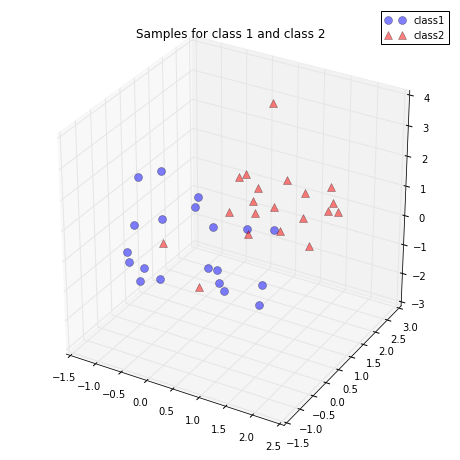

In [5]:
%matplotlib inline

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,projection='3d')
plt.rcParams['legend.fontsize']=10
ax.plot(class1_sample[0,:],class1_sample[1,:],class1_sample[2,:],'o',markersize=8, \
       color='blue',alpha=0.5,label='class1')
ax.plot(class2_sample[0,:],class2_sample[1,:],class2_sample[2,:],'^',markersize=8, \
       color='red',alpha=0.5,label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

## step1 Taking the whole dataset ignoring the class labels  
Because we don't need class labels for the PCA analysis,let us merge the samples for our 2 classes into one $3\times 40$-dimensional array.  

In [6]:
all_samples=np.concatenate((class1_sample,class2_sample),axis=1)

## step2 Computing the d-dimendional mean vector

In [8]:
mean_x=np.mean(all_samples[0,:])
mean_y=np.mean(all_samples[1,:])
mean_z=np.mean(all_samples[2,:])

mean_vector=np.array([[mean_x],[mean_y],[mean_z]])

print 'Mean Vector:\n',mean_vector

Mean Vector:
[[ 0.43066541]
 [ 0.69848315]
 [ 0.42565371]]


## step3 Computing the Scatter Matrix    

** scatter matrix**  
The scatter matrix is computed by the following equation:  
$$ S=\sum_{k=1}^{n}(x_k-m)(x_k-m)^T$$
where m is the mean vector
$$m=\frac{1}{n}\sum_{k=1}^{n}x_k$$

In [9]:
scatter_matrix=np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix+=(all_samples[:,i].reshape(3,1)-mean_vector).dot((all_samples[:,i].reshape(3,1) \
                                                                    -mean_vector).T)
print 'Scatter Matrix:\n',scatter_matrix

Scatter Matrix:
[[ 37.52347172   8.53650015  14.70592444]
 [  8.53650015  36.23651274  11.46299108]
 [ 14.70592444  11.46299108  51.28576135]]


** Covariance Matrix**  
The covariance matrix is computed by the following equation:  
$$\Sigma=\frac{1}{N-1}\sum_{k=1}^{n}(x_k-m)(x_k-m)^T$$

In [11]:
cov_mat=np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print 'Covariance Matrix:\n',cov_mat

Covariance Matrix:
[[ 0.9621403   0.21888462  0.37707499]
 [ 0.21888462  0.92914135  0.29392285]
 [ 0.37707499  0.29392285  1.31501952]]


In [14]:
cov_mat*39

array([[ 37.52347172,   8.53650015,  14.70592444],
       [  8.53650015,  36.23651274,  11.46299108],
       [ 14.70592444,  11.46299108,  51.28576135]])

## step4 Computing eigenvectors and corresponding eigenvalues  
The eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix.

In [15]:
eig_val_sc,eig_vec_sc=np.linalg.eig(scatter_matrix)
eig_val_cov,eig_vec_cov=np.linalg.eig(cov_mat)

## step5 Reduce the dimensionality  

**1 sorting the eigenvectors by decreasing eigenvalues**

In [18]:
eig_pairs=[(np.abs(eig_val_sc[i]),eig_vec_sc[:,i])for i in range(len(eig_val_sc))]

eig_pairs.sort(key=lambda x:x[0],reverse=True)

for i in eig_pairs:
    print i[0]

67.2069271912
30.1363720924
27.7024465286


**2 choosing k eigenvectors with the largest eigenvalues**

In [20]:
matrix_w=np.hstack((eig_pairs[0][1].reshape(3,1),eig_pairs[1][1].reshape(3,1)))
print 'Matrix W:\n',matrix_w

Matrix W:
[[ 0.49696693 -0.16261452]
 [ 0.41837223 -0.81568346]
 [ 0.76025558  0.55517296]]


## step6 Transforming the samples onto the new subspace  
Transform our samples onto the new subspace via the equation $y=W^T \times x$

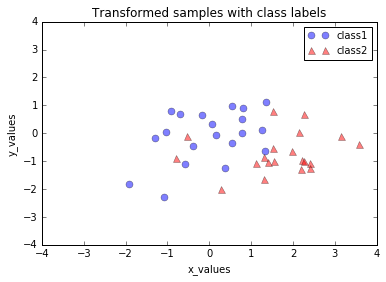

In [22]:
transformed=matrix_w.T.dot(all_samples)
assert transformed.shape==(2,40),'The matrix is not 2x40 dimensional.'

plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

# Using the PCA() class from the sklearn.decomposition library to confirm our results

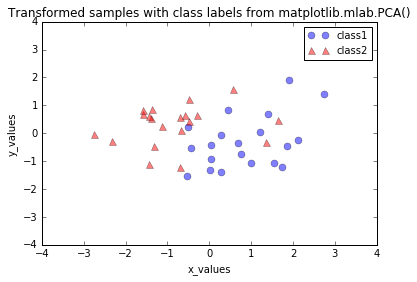

In [24]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca=sklearnPCA(n_components=2)
sklearn_transf=sklearn_pca.fit_transform(all_samples.T)

plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

The plot above seems to be the exact mirror image of the plot from our step by step approach.This is due to the fact that the signs of the eigenvectors can be either positive or negative,since the eigenvectors are scaled to the unit length 1,both we can simply multiply the transformed data by x(-1) to revert the mirror image.

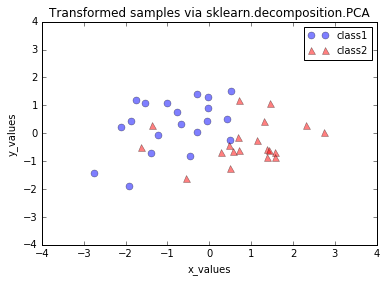

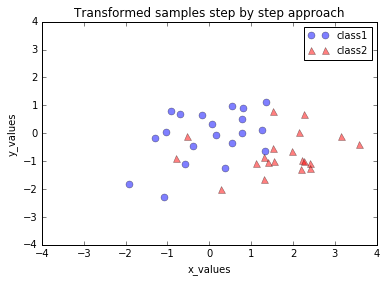

In [25]:
sklearn_transf = sklearn_transf * (-1)

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

# step by step PCA
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples step by step approach')
plt.show()